## MLP using Sklearn

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import numpy

In [6]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [7]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [8]:
# train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [9]:
#Normalization

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [10]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.97322078
Iteration 2, loss = 0.95988981
Iteration 3, loss = 0.94696938
Iteration 4, loss = 0.93513825
Iteration 5, loss = 0.92364982
Iteration 6, loss = 0.91253170
Iteration 7, loss = 0.90252676
Iteration 8, loss = 0.89203360
Iteration 9, loss = 0.88301304
Iteration 10, loss = 0.87440040
Iteration 11, loss = 0.86560356
Iteration 12, loss = 0.85744149
Iteration 13, loss = 0.84999216
Iteration 14, loss = 0.84251866
Iteration 15, loss = 0.83473714
Iteration 16, loss = 0.82785462
Iteration 17, loss = 0.82033614
Iteration 18, loss = 0.81305501
Iteration 19, loss = 0.80620462
Iteration 20, loss = 0.79849013
Iteration 21, loss = 0.79150308
Iteration 22, loss = 0.78417821
Iteration 23, loss = 0.77650951
Iteration 24, loss = 0.76918459
Iteration 25, loss = 0.76178319
Iteration 26, loss = 0.75447200
Iteration 27, loss = 0.74629910
Iteration 28, loss = 0.73865381
Iteration 29, loss = 0.73028236
Iteration 30, loss = 0.72224070
Iteration 31, loss = 0.71389669
Iteration 32, los

Iteration 371, loss = 0.39835421
Iteration 372, loss = 0.39819716
Iteration 373, loss = 0.39803991
Iteration 374, loss = 0.39792199
Iteration 375, loss = 0.39771457
Iteration 376, loss = 0.39753832
Iteration 377, loss = 0.39743809
Iteration 378, loss = 0.39726390
Iteration 379, loss = 0.39707111
Iteration 380, loss = 0.39702177
Iteration 381, loss = 0.39684406
Iteration 382, loss = 0.39667953
Iteration 383, loss = 0.39650965
Iteration 384, loss = 0.39631985
Iteration 385, loss = 0.39626428
Iteration 386, loss = 0.39606407
Iteration 387, loss = 0.39600080
Iteration 388, loss = 0.39592057
Iteration 389, loss = 0.39580708
Iteration 390, loss = 0.39564546
Iteration 391, loss = 0.39546049
Iteration 392, loss = 0.39531692
Iteration 393, loss = 0.39517120
Iteration 394, loss = 0.39501167
Iteration 395, loss = 0.39498241
Iteration 396, loss = 0.39472792
Iteration 397, loss = 0.39462306
Iteration 398, loss = 0.39454053
Iteration 399, loss = 0.39437000
Iteration 400, loss = 0.39424720
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=2, warm_start=False)

In [11]:
predictions = mlp.predict(X_test)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.7578125
[[141  26]
 [ 36  53]]
             precision    recall  f1-score   support

        0.0       0.80      0.84      0.82       167
        1.0       0.67      0.60      0.63        89

avg / total       0.75      0.76      0.75       256



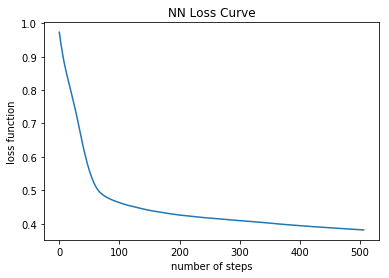

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [14]:
mlp.intercepts_[0]

array([-0.5249071 ,  0.1700326 , -0.39897293,  0.26197665,  0.67937069,
       -0.23543951, -0.42346965,  0.57378384,  0.44934149,  0.64005531])

In [15]:
mlp.coefs_[0]

array([[-0.55928868,  0.66385502, -0.69574201,  0.13365657,  0.47693323,
         0.08941265,  0.04590865, -0.63396423, -0.2246715 , -0.27983777],
       [-0.1613758 ,  0.44238716, -0.08587449, -0.4909734 , -0.24733358,
         0.78668871, -0.03195062, -0.0881965 ,  0.72609208, -0.43657676],
       [-0.11956422,  0.25549102, -0.07884334,  0.32586542, -0.03416981,
        -0.37926947,  0.59039251,  0.05046251, -0.34620815,  0.04649428],
       [-0.46710738,  0.15769164, -0.12577799, -0.1012587 ,  0.00123092,
        -0.09483741,  0.27909234, -0.14596814,  0.01856832,  0.10822566],
       [ 0.02297974, -0.3088399 ,  0.38147033,  0.11158207, -0.27225341,
         0.43595463, -0.05445018,  0.3983138 , -0.41191425,  0.08140992],
       [-0.23357521, -0.09753897,  0.45444182,  0.11304829, -0.30721764,
        -0.7155523 , -0.31823434, -0.11553111,  0.47081963,  0.03727143],
       [ 0.57753824,  0.31028408, -0.49539648, -0.11332918, -0.24209888,
        -0.18446616,  0.68401116,  0.03106117

## MLP using keras

In [16]:
from keras.models import Sequential
from keras.layers import Dense


# create keras model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

print(model.summary())

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


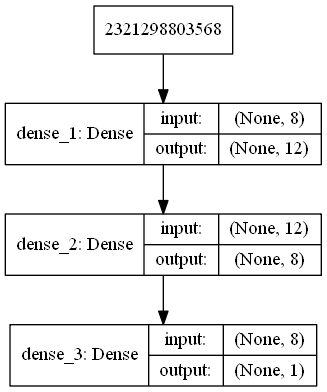

In [17]:
#conda install pydot pydotplus

from keras.utils import plot_model
import IPython
plot_model(model, to_file='model.png',show_shapes=True)
IPython.display.Image("model.png")

In [18]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model

history=model.fit(X_train, y_train, validation_split=0.25, epochs=80, batch_size=10)
# calculate predictions

Instructions for updating:
Use tf.cast instead.
Train on 384 samples, validate on 128 samples
Epoch 1/80
384/384 [==============================] - 1s 3ms/step - loss: 0.6904 - acc: 0.6615 - val_loss: 0.6878 - val_acc: 0.6172
Epoch 2/80
384/384 [==============================] - 0s 328us/step - loss: 0.6780 - acc: 0.6615 - val_loss: 0.6695 - val_acc: 0.6172
Epoch 3/80
384/384 [==============================] - 0s 331us/step - loss: 0.6393 - acc: 0.6615 - val_loss: 0.6234 - val_acc: 0.6172
Epoch 4/80
384/384 [==============================] - 0s 336us/step - loss: 0.5768 - acc: 0.6615 - val_loss: 0.5806 - val_acc: 0.6172
Epoch 5/80
384/384 [==============================] - 0s 299us/step - loss: 0.5344 - acc: 0.6615 - val_loss: 0.5656 - val_acc: 0.6172
Epoch 6/80
384/384 [==============================] - 0s 318us/step - loss: 0.5165 - acc: 0.6615 - val_loss: 0.5551 - val_acc: 0.6172
Epoch 7/80
384/384 [==============================] - 0s 328us/step - loss: 0.5092 - acc: 0.6615 - val_l

384/384 [==============================] - 0s 318us/step - loss: 0.4428 - acc: 0.7969 - val_loss: 0.5156 - val_acc: 0.8047
Epoch 60/80
384/384 [==============================] - 0s 305us/step - loss: 0.4421 - acc: 0.7995 - val_loss: 0.5144 - val_acc: 0.8047
Epoch 61/80
384/384 [==============================] - 0s 302us/step - loss: 0.4411 - acc: 0.7969 - val_loss: 0.5133 - val_acc: 0.8047
Epoch 62/80
384/384 [==============================] - 0s 305us/step - loss: 0.4416 - acc: 0.7943 - val_loss: 0.5123 - val_acc: 0.8047
Epoch 63/80
384/384 [==============================] - 0s 302us/step - loss: 0.4409 - acc: 0.7995 - val_loss: 0.5115 - val_acc: 0.8047
Epoch 64/80
384/384 [==============================] - 0s 310us/step - loss: 0.4401 - acc: 0.7943 - val_loss: 0.5152 - val_acc: 0.8047
Epoch 65/80
384/384 [==============================] - 0s 309us/step - loss: 0.4387 - acc: 0.7969 - val_loss: 0.5164 - val_acc: 0.8047
Epoch 66/80
384/384 [==============================] - 0s 316us/ste

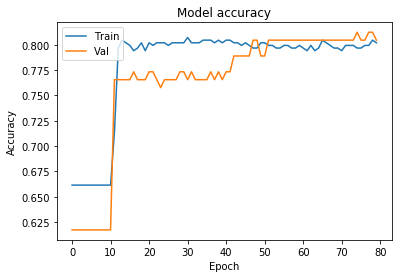

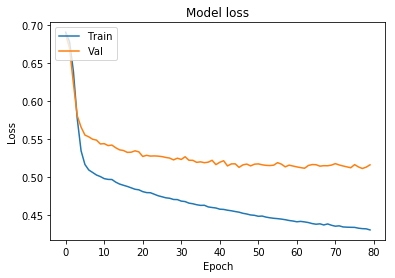

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [20]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[array([[ 0.03722791,  0.04094259,  0.0207773 ,  0.02347262,  0.31080845,
         0.1071166 , -0.24440894, -0.01912508, -0.09402163, -0.11063407,
         0.13649176, -0.08683749],
       [ 0.264137  ,  0.24563627,  0.29580006,  0.30804384,  0.23724084,
         0.25817612, -0.2147307 , -0.09353642, -0.13785382, -0.29033926,
        -0.3350163 , -0.20849766],
       [-0.07013796, -0.07517216, -0.0689001 , -0.0718228 , -0.24032205,
        -0.08382352,  0.26806223, -0.06838308,  0.14729232,  0.06996444,
        -0.18915321,  0.1138351 ],
       [-0.07092462, -0.09814887, -0.07228779, -0.07683397, -0.00104205,
        -0.02269289, -0.01988207,  0.11071875, -0.09161324,  0.00157977,
        -0.29215556, -0.0646499 ],
       [ 0.00668982, -0.02809055,  0.0135654 ,  0.01523664, -0.2681933 ,
        -0.0845606 , -0.3247615 , -0.2346693 , -0.09329829,  0.16002688,
         0.09717835, -0.19355243],
       [ 0.17702335,  0.20840985,  0.1903421 ,  0.20244087, -0.04195351,
         0.16911744, 

In [21]:
predictions = model.predict(X_test)  
p_labels = [round(x[0]) for x in predictions]


In [22]:
p_labels

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0

In [23]:
print("Accuracy", metrics.accuracy_score(y_test, p_labels))
print(confusion_matrix(y_test,p_labels))  
print(classification_report(y_test,p_labels))  

Accuracy 0.7421875
[[141  26]
 [ 40  49]]
             precision    recall  f1-score   support

        0.0       0.78      0.84      0.81       167
        1.0       0.65      0.55      0.60        89

avg / total       0.74      0.74      0.74       256

